<a href="https://colab.research.google.com/github/mars241/WebScrapping/blob/main/AAM_WCS__Q2_WebScrapping_n_pages_for_http_www_chucknorrisfacts_fr_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge
#Scraper Chuck Norris sur plusieurs pages

Source : Know Your Meme

Continue ton entraînement en scrapant des Chuck Norris facts à partir de cette adresse : Chuck Norris facts ou de cette autre adresse Chuck Norris facts FR.

1. Observe attentivement l'URL de la page 1. Essaye de passer à la page 2. Dans un notebook python, essaye de générer automatiquement les URL des 5 premières pages (avec une boucle par exemple ?)
2. Utilise BeautifulSoup pour scraper les facts et les notes des 5 premières pages, grâce aux URL que tu as générées. (Nous pourrions faire les 100 ou 200 pages suivantes, mais ca risque d'entrainer une charge inutile pour ceux qui administrent ce serveur.) Le résultat doit être dans un dictionnaire.
3. Crée un DataFrame contenant ces données, il doit donc posséder 2 colonnes et 100 lignes.
4. Crée une visualisation de la distribution des notes.
Partage le lien vers ton notebook en guise de solution au challenge.


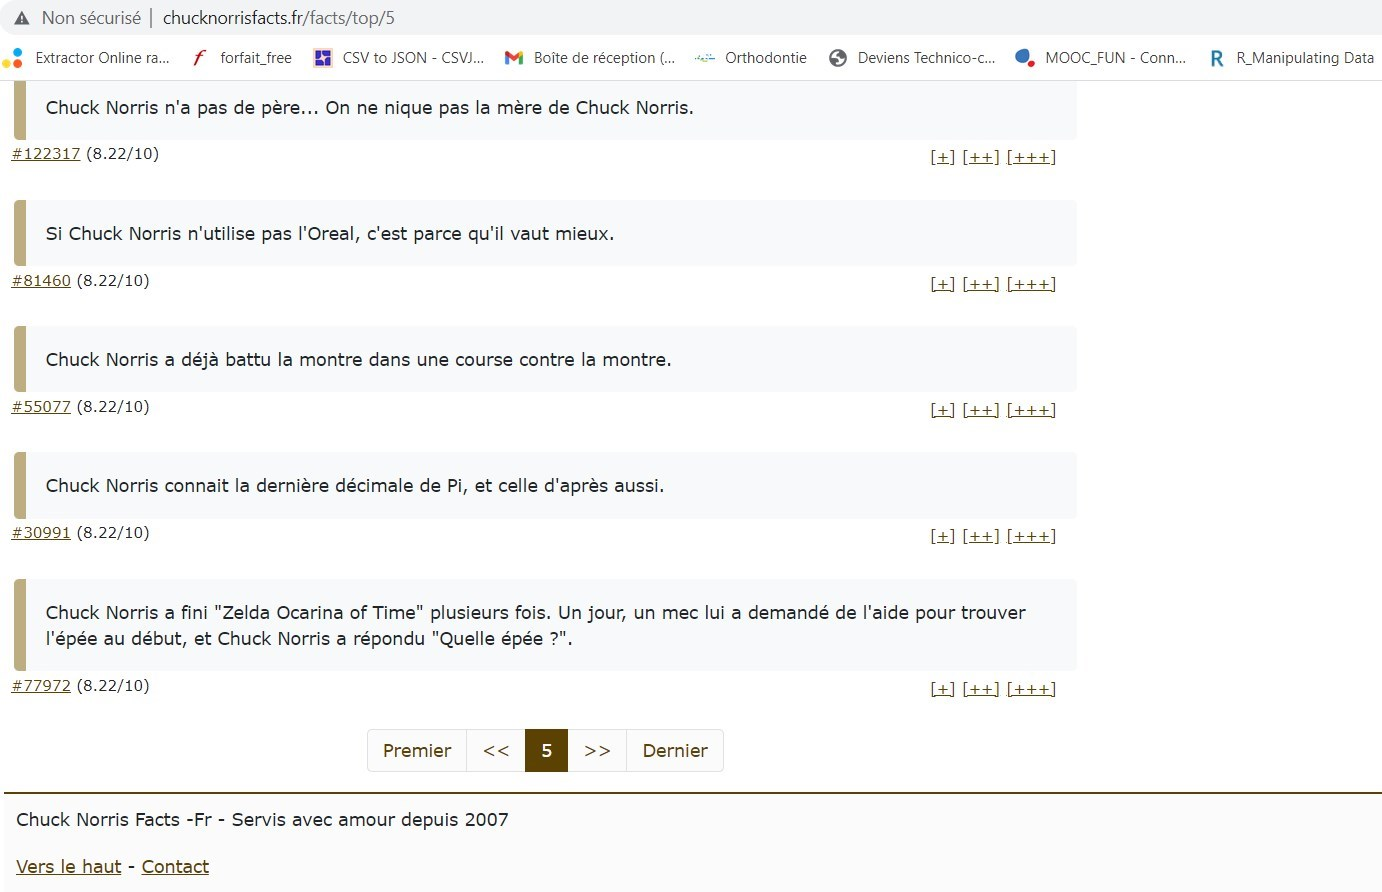

#1. Observe attentivement l'URL de la page 1. Essaye de passer à la page 2. Dans un notebook python, essaye de générer automatiquement les URL des 5 premières pages (avec une boucle par exemple ?)

# 2. Utilise BeautifulSoup pour scraper les facts et les notes des 5 premières pages, grâce aux URL que tu as générées. (Nous pourrions faire les 100 ou 200 pages suivantes, mais ca risque d'entrainer une charge inutile pour ceux qui administrent ce serveur.) Le résultat doit être dans un dictionnaire.

In [2]:
# import des bibliothèques:
import requests
from bs4 import BeautifulSoup

In [3]:
# Génère automatiquement les URL des 5 premières pages avec une boucle

pages = []

for i in range(1, 6):
    url = 'http://www.chucknorrisfacts.fr/facts/top/' + str(i)
    pages.append(url)

items_container =[]
items_jokes =[]
items_rating =[]

for item in pages:
    page = requests.get(item)
    soup = BeautifulSoup(page.text, 'html.parser')
    items_container.append(soup.find_all("div", {"class", "card"}))
    items_jokes.append(soup.find_all(class_= "card-text"))
    items_rating.append(soup.find_all("span"))

joke_rating ={}
for value in items_container:
  for i in range(len(value)):
    joke_rating[value[i].p.text] = value[i].span.text

#3. Crée un DataFrame contenant ces données, il doit donc posséder 2 colonnes et 100 lignes.


In [13]:

from pandas.io.parsers.readers import is_index_col
import pandas as pd

df = pd.DataFrame(joke_rating.items(), columns=['Jokes', 'Rating_Result'])
df

,Jokes,Rating_Result
0,Les ennemis des amis de Chuck Norris sont ses ...,(8.92/10)
1,"Un jour Chuck Norris a eu un zero en latin, de...",(8.43/10)
2,L'avenir se demande parfois ce que Chuck Norri...,(8.42/10)
3,Chuck Norris ne sait pas à quoi ressemble Nico...,(8.42/10)
4,,(8.42/10)
...,...,...
95,Chuck Norris n'a pas de père... On ne nique pa...,(8.22/10)
96,"Si Chuck Norris n'utilise pas l'Oreal, c'est p...",(8.22/10)
97,Chuck Norris a déjà battu la montre dans une c...,(8.22/10)
98,Chuck Norris connait la dernière décimale de P...,(8.22/10)


In [20]:
# import pour "remane columns DF"
import re


df["Score"] = df['Rating_Result'].apply(lambda x: re.search('\d{1}.\d{2}', x).group(0))

# 4. Crée une visualisation de la distribution des notes.

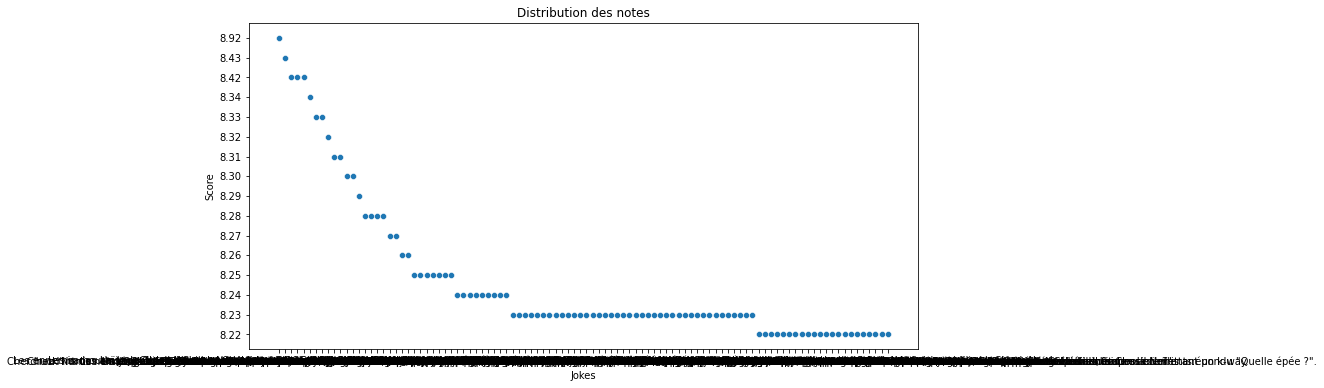

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize = (12,6))

jokes =[]
for i in range(1, 101):
  jokes.append(i)


sns.scatterplot(data = df, x= 'Jokes', y='Score')
plt.title("Distribution des notes")
plt.show()